In [70]:
import pandas as pd
import matplotlib.pyplot as plt

#plt.rcParams['figure.figsize'] = [12, 8]


# read the data and drop information regarding z axis, time frame and vicon tracking labels
data = pd.read_csv('../rover/data/recordingTest8minutes.csv')
data.columns = ['Time frame', 'RobotName', 'XCoord', 'YCoord', 'ZCoord', 'XOrient', 'YOrient', 'ZOrient', 'LMotor', 'RMotor']
data_reduced = data.drop(['Time frame', 'RobotName', 'ZCoord', 'ZOrient'], 1)

In [71]:
# check number of datapoints
data_reduced.shape

(71743, 6)

In [72]:
# check for any nan values
data_reduced.isnull().values.any()

False

Text(0.5, 1.0, 'RMotor')

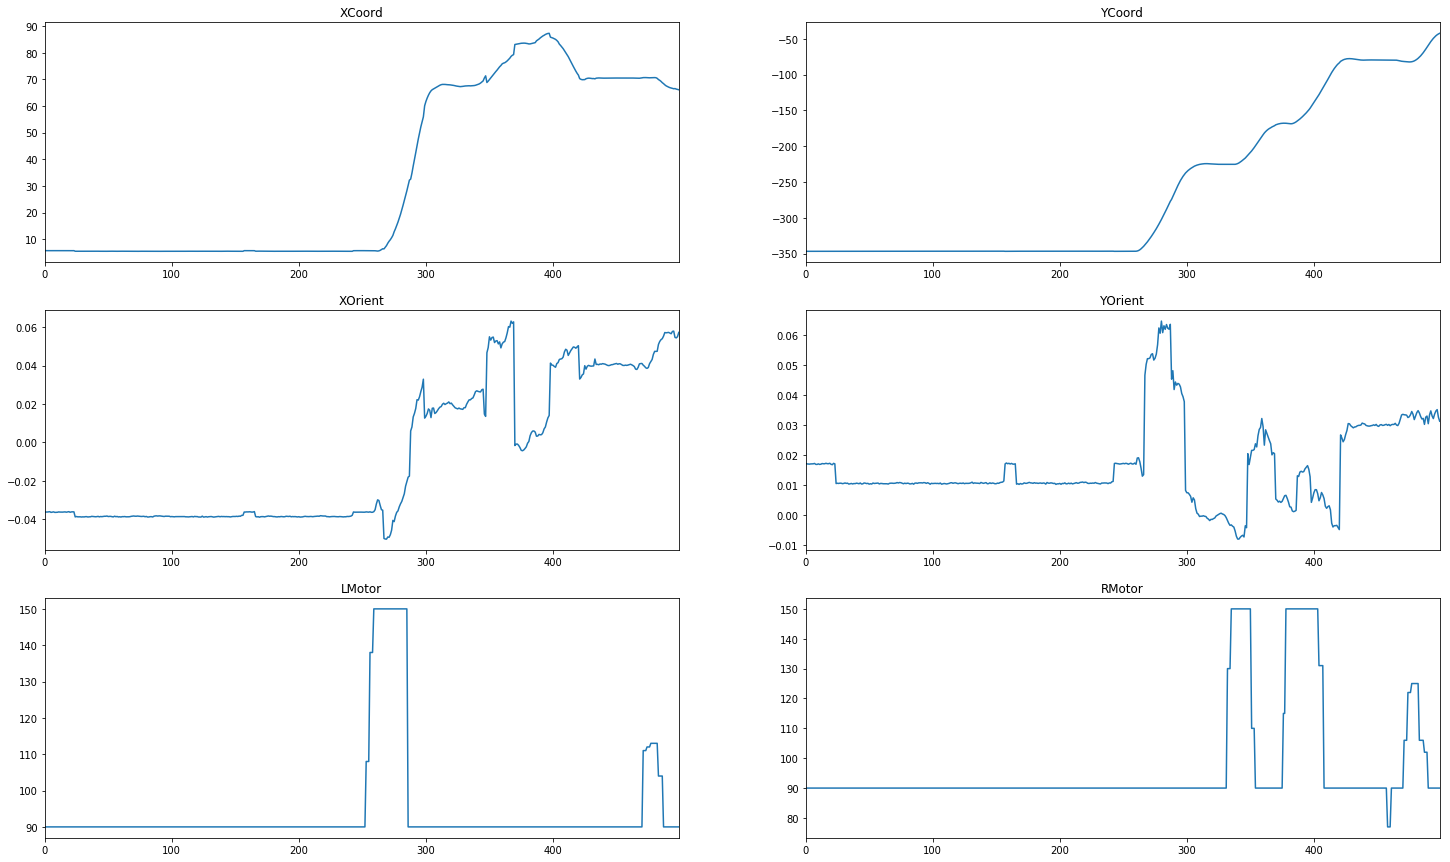

In [76]:
# Look at the data as time series, one column at a time. First 500 points.
fig, axes = plt.subplots(figsize=(25, 15), nrows=3, ncols=2)
data_reduced['XCoord'][0:500].plot(ax=axes[0,0]); axes[0,0].set_title('XCoord')
data_reduced['YCoord'][0:500].plot(ax=axes[0,1]); axes[0,1].set_title('YCoord')

data_reduced['XOrient'][0:500].plot(ax=axes[1,0]); axes[1,0].set_title('XOrient')
data_reduced['YOrient'][0:500].plot(ax=axes[1,1]); axes[1,1].set_title('YOrient')

data_reduced['LMotor'][0:500].plot(ax=axes[2,0]); axes[2,0].set_title('LMotor')
data_reduced['RMotor'][0:500].plot(ax=axes[2,1]); axes[2,1].set_title('RMotor')

Text(0.5, 1.0, 'RMotor')

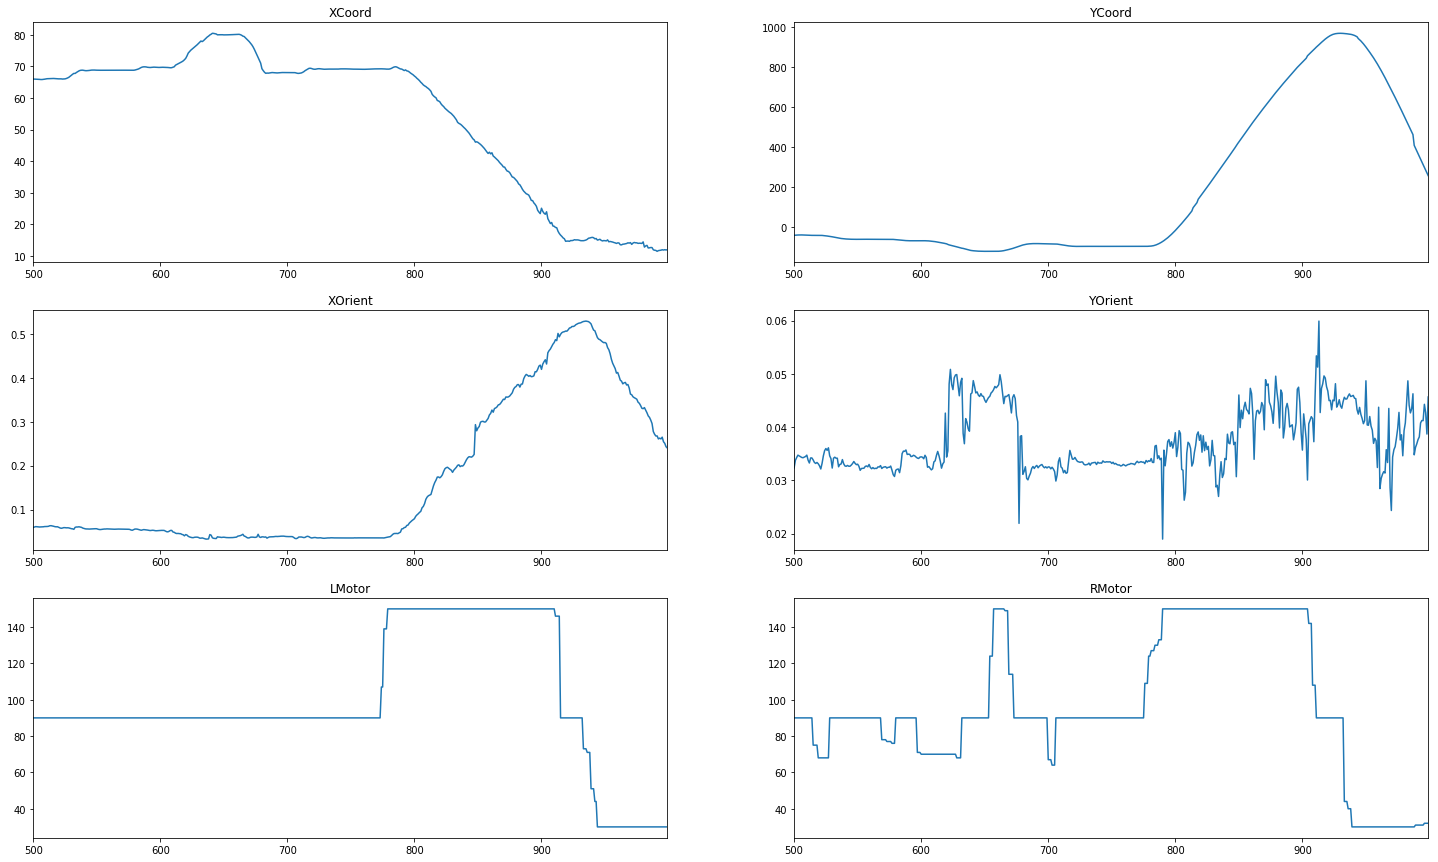

In [78]:
# Remove first 250 since there is no activity
data_reduced = data_reduced.iloc[250:]

# Replot data
fig, axes = plt.subplots(figsize=(25, 15), nrows=3, ncols=2)
data_reduced['XCoord'][0:500].plot(ax=axes[0,0]); axes[0,0].set_title('XCoord')
data_reduced['YCoord'][0:500].plot(ax=axes[0,1]); axes[0,1].set_title('YCoord')

data_reduced['XOrient'][0:500].plot(ax=axes[1,0]); axes[1,0].set_title('XOrient')
data_reduced['YOrient'][0:500].plot(ax=axes[1,1]); axes[1,1].set_title('YOrient')

data_reduced['LMotor'][0:500].plot(ax=axes[2,0]); axes[2,0].set_title('LMotor')
data_reduced['RMotor'][0:500].plot(ax=axes[2,1]); axes[2,1].set_title('RMotor')

Text(0.5, 1.0, 'RMotor')

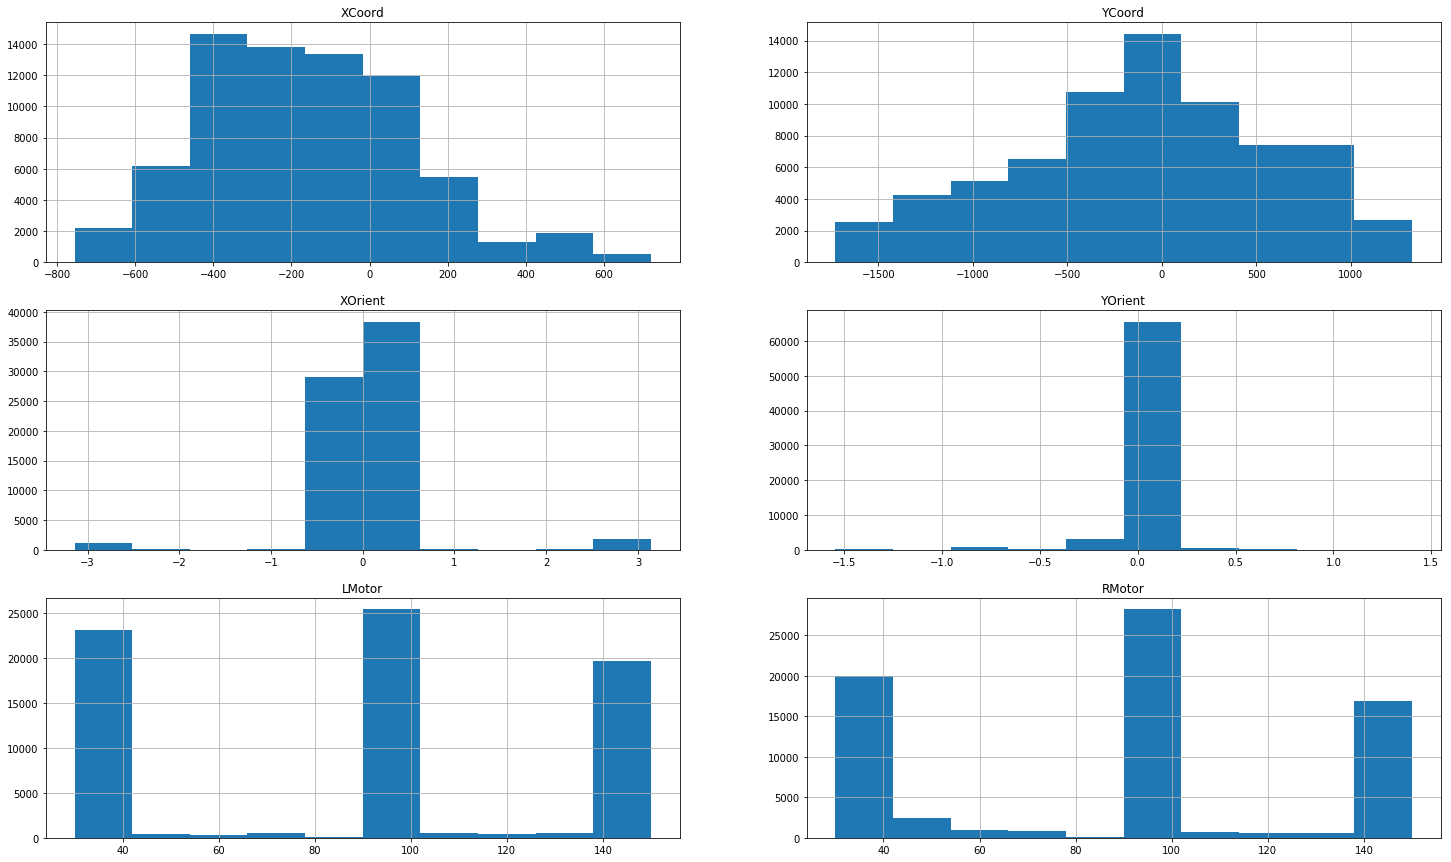

In [79]:
# Look at the data, one column at a time
fig2, axes = plt.subplots(figsize=(25, 15), nrows=3, ncols=2)
data_reduced['XCoord'].hist(ax=axes[0,0]); axes[0,0].set_title('XCoord')
data_reduced['YCoord'].hist(ax=axes[0,1]); axes[0,1].set_title('YCoord')

data_reduced['XOrient'].hist(ax=axes[1,0]); axes[1,0].set_title('XOrient')
data_reduced['YOrient'].hist(ax=axes[1,1]); axes[1,1].set_title('YOrient')

data_reduced['LMotor'].hist(ax=axes[2,0]); axes[2,0].set_title('LMotor')
data_reduced['RMotor'].hist(ax=axes[2,1]); axes[2,1].set_title('RMotor')

Text(0.5, 1.0, 'RMotor')

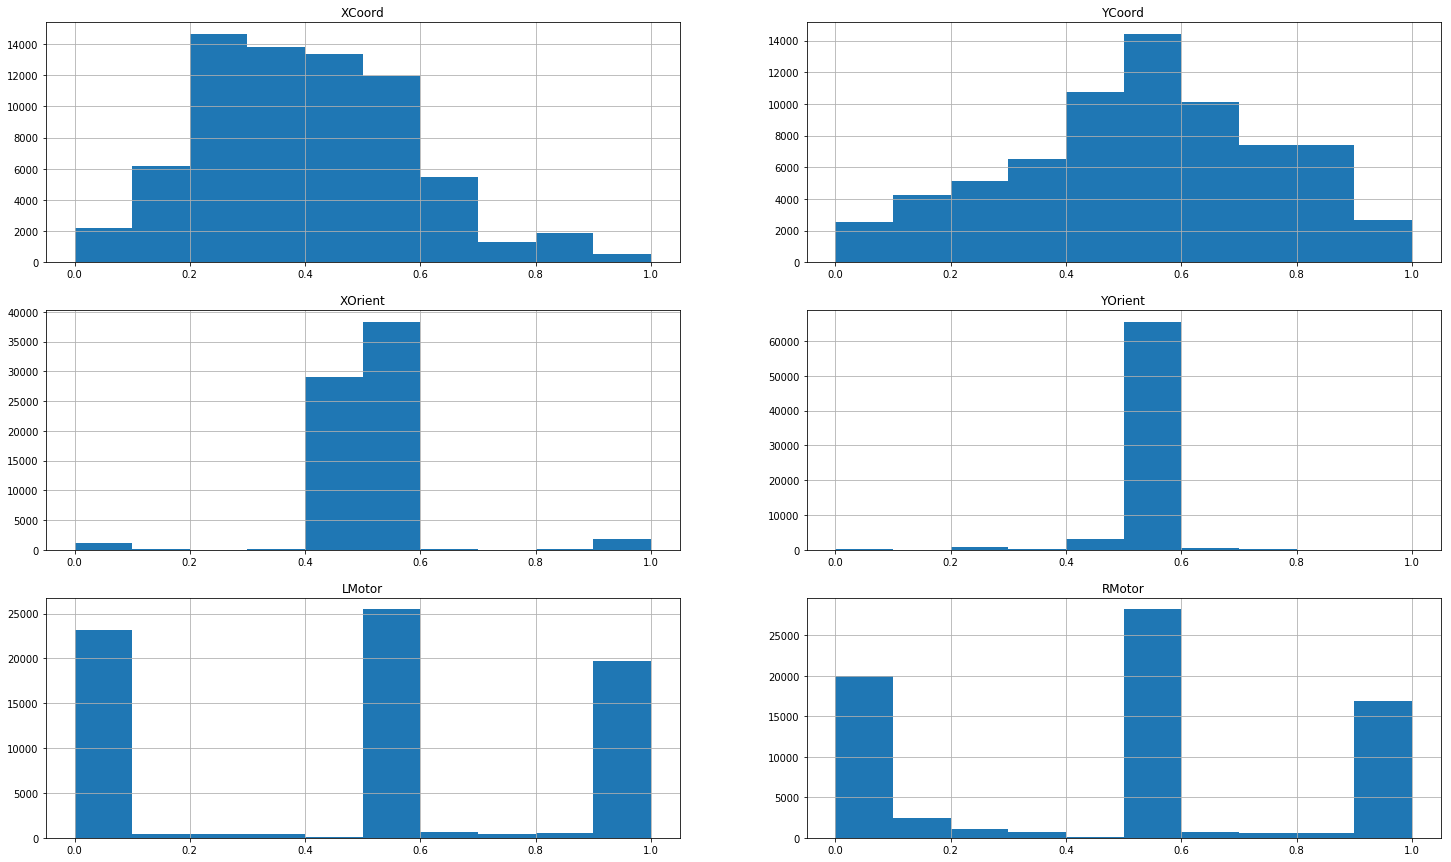

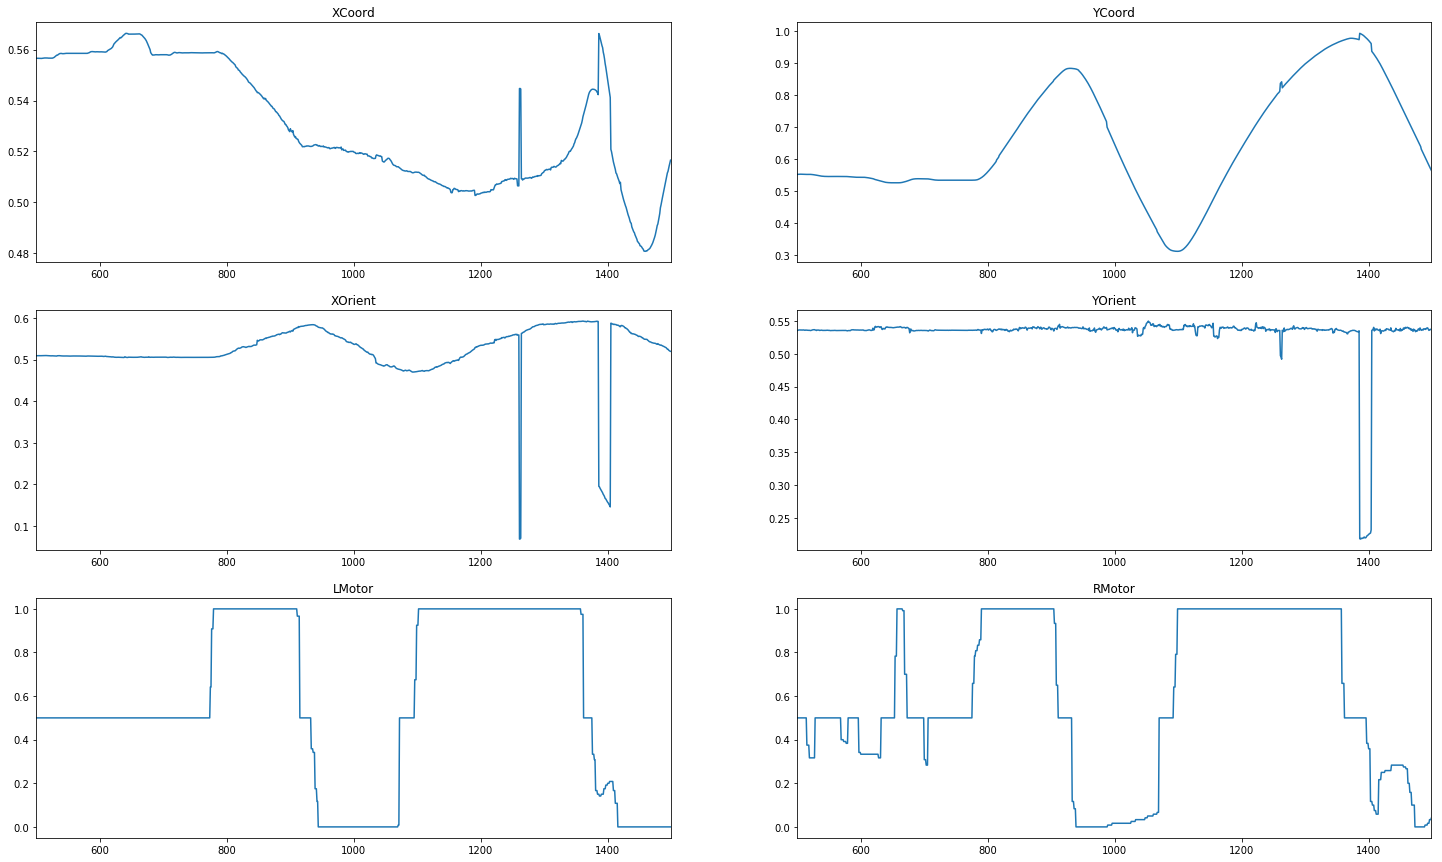

In [84]:
data_normalised = data_reduced.copy()

# z-score normalisation for orientation data
#data_normalised[['XOrient','YOrient']] = (data_normalised[['XOrient','YOrient']] - data_normalised[['XOrient','YOrient']].mean())/data_normalised[['XOrient','YOrient']].std()

# min-max normalisation for orientation data
#data_normalised[['XOrient','YOrient']] = (data_normalised[['XOrient','YOrient']] - data_normalised[['XOrient','YOrient']].min())/(data_normalised[['XOrient','YOrient']].max()-data_normalised[['XOrient','YOrient']].min())

# min-max normalisation for coordinates data
#data_normalised[['XCoord','YCoord']] = (data_reduced[['XCoord','YCoord']] - data_reduced[['XCoord','YCoord']].min())/(data_reduced[['XCoord','YCoord']].max()-data_reduced[['XCoord','YCoord']].min())

# zero-mean normalisation
# data_normalised = data_normalised - data_normalised.mean()

# min-max normalisation
data_normalised = (data_normalised - data_normalised.min())/(data_normalised.max() - data_normalised.min())

# data_reduced.head()
# data_normalised.head()

fig3, axes = plt.subplots(figsize=(25, 15), nrows=3, ncols=2)
data_normalised['XCoord'].hist(ax=axes[0,0]); axes[0,0].set_title('XCoord')
data_normalised['YCoord'].hist(ax=axes[0,1]); axes[0,1].set_title('YCoord')

data_normalised['XOrient'].hist(ax=axes[1,0]); axes[1,0].set_title('XOrient')
data_normalised['YOrient'].hist(ax=axes[1,1]); axes[1,1].set_title('YOrient')

data_normalised['LMotor'].hist(ax=axes[2,0]); axes[2,0].set_title('LMotor')
data_normalised['RMotor'].hist(ax=axes[2,1]); axes[2,1].set_title('RMotor')


fig4, axes = plt.subplots(figsize=(25, 15), nrows=3, ncols=2)
data_normalised['XCoord'][:1000].plot(ax=axes[0,0]); axes[0,0].set_title('XCoord')
data_normalised['YCoord'][:1000].plot(ax=axes[0,1]); axes[0,1].set_title('YCoord')

data_normalised['XOrient'][:1000].plot(ax=axes[1,0]); axes[1,0].set_title('XOrient')
data_normalised['YOrient'][:1000].plot(ax=axes[1,1]); axes[1,1].set_title('YOrient')

data_normalised['LMotor'][:1000].plot(ax=axes[2,0]); axes[2,0].set_title('LMotor')
data_normalised['RMotor'][:1000].plot(ax=axes[2,1]); axes[2,1].set_title('RMotor')

In [82]:
# save data to new csv file, without index
data_normalised.to_csv('Pre-processed_data.csv', index=False)